In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_excel(r'Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.shape

(10683, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['year_of_Journey']=data['Date_of_Journey'].dt.year
data['month_of_Journey']=data['Date_of_Journey'].dt.month
data['day_of_Journey']=data['Date_of_Journey'].dt.day

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
Airline             10682 non-null object
Date_of_Journey     10682 non-null datetime64[ns]
Source              10682 non-null object
Destination         10682 non-null object
Route               10682 non-null object
Dep_Time            10682 non-null object
Arrival_Time        10682 non-null object
Duration            10682 non-null object
Total_Stops         10682 non-null object
Additional_Info     10682 non-null object
Price               10682 non-null int64
year_of_Journey     10682 non-null int64
month_of_Journey    10682 non-null int64
day_of_Journey      10682 non-null int64
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 1.2+ MB


In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [12]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Dep_Hour']=data['Dep_Time'].dt.hour
data['Dep_Min']=data['Dep_Time'].dt.minute

In [13]:
data["Arrival_hour"] =pd.to_datetime(data['Arrival_Time'],errors='coerce').dt.hour
data['Arrival_hour'].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17], dtype=int64)

In [14]:
data["Arrival_min"] =pd.to_datetime(data['Arrival_Time'],errors='coerce').dt.hour
data['Arrival_min'].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17], dtype=int64)

In [15]:
data.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Route'],axis=1,inplace=True)

In [16]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,13
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,2019,9,6,9,25,4,4
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,23
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,21


In [17]:
data['Additional_Info']=data['Additional_Info'].replace('No info','No Info')

In [18]:
data['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [19]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No Info,3897,2019,3,24,22,20,1,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No Info,7662,2019,1,5,5,50,13,13
2,Jet Airways,Delhi,Cochin,19h,2 stops,No Info,13882,2019,9,6,9,25,4,4
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No Info,6218,2019,12,5,18,5,23,23
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No Info,13302,2019,1,3,16,50,21,21


In [20]:
data['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [21]:
array=data['Duration'].to_list()
array[:5]


['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m']

In [22]:
duration_hour=[]
duration_min=[]
for item in array:
    if 'h' in item and 'm' in item:
        item=item.split('h')
        hour=int(item[0])
        minute=int(item[1].rstrip('m'))
        duration_hour.append(hour)
        duration_min.append(minute)
    elif 'h' not in item:
        minute=int(item[0].rstrip('m'))
        duration_hour.append(0)
        duration_min.append(minute)
    else:
        hour=int(item[0].rstrip('h'))
        duration_hour.append(hour)
        duration_min.append(0)



In [23]:
data['duration_hour']=duration_hour
data['duration_min']=duration_min

In [24]:
data.drop('Duration',axis=1,inplace=True)

In [25]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897,2019,3,24,22,20,1,1,2,50
1,Air India,Kolkata,Banglore,2 stops,No Info,7662,2019,1,5,5,50,13,13,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882,2019,9,6,9,25,4,4,1,0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218,2019,12,5,18,5,23,23,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302,2019,1,3,16,50,21,21,4,45


In [26]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
num_features=[feature for feature in data.columns if data[feature].dtype!='O']
cont_features=[feature for feature in num_features if len(data[feature].unique())>25]
disc_feature=[feature for feature in num_features if len(data[feature].unique())<25]

In [27]:
import seaborn as sns
print(cont_features)

['Price', 'duration_hour']


# finding outliers


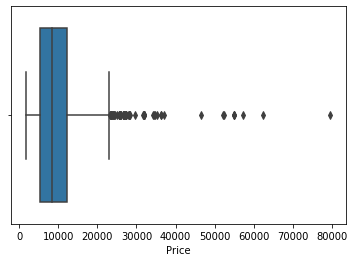

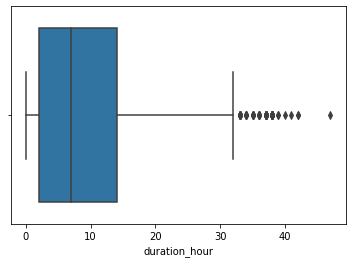

In [28]:
for feature in cont_features:
    sns.boxplot(data[feature])
    plt.show()

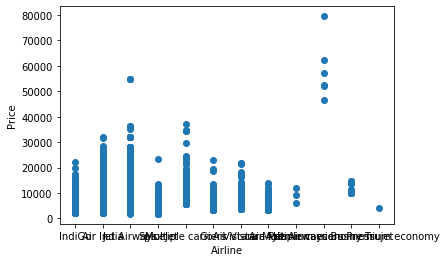

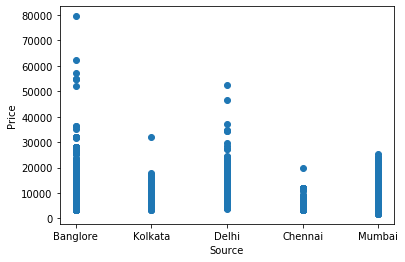

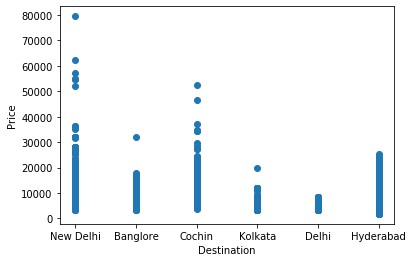

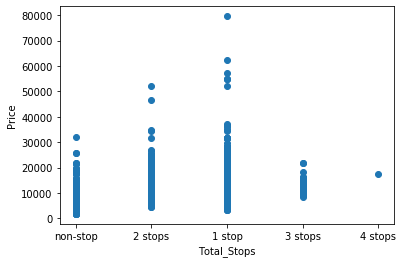

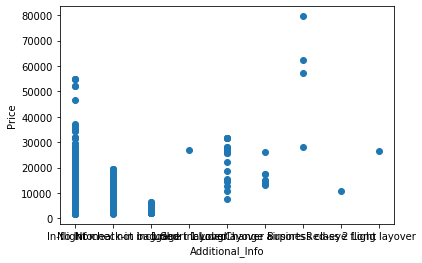

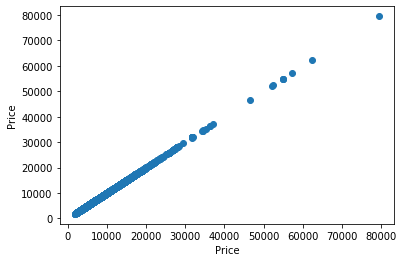

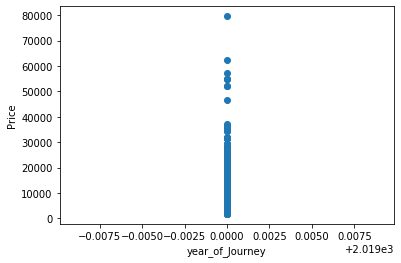

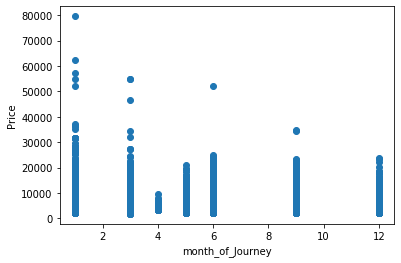

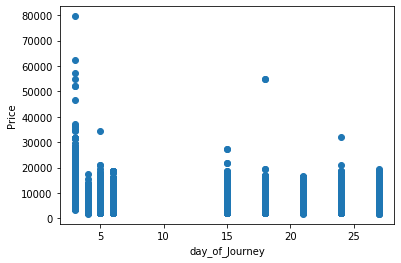

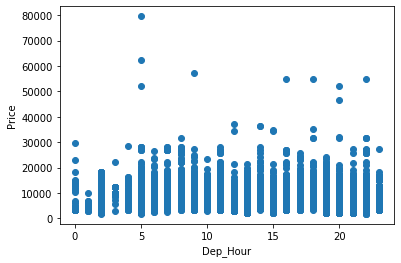

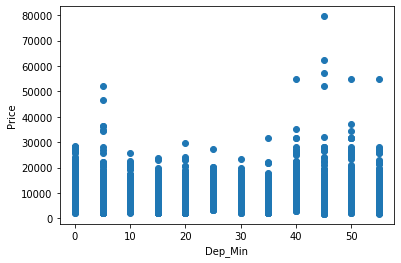

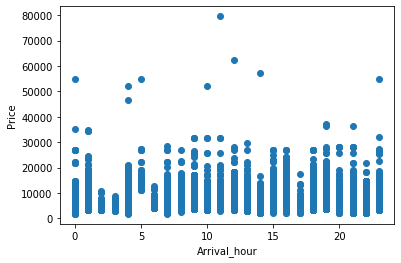

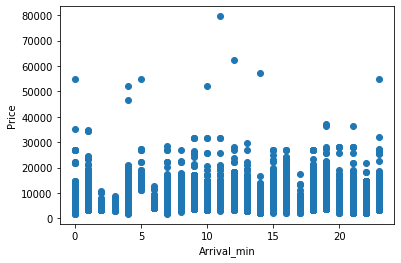

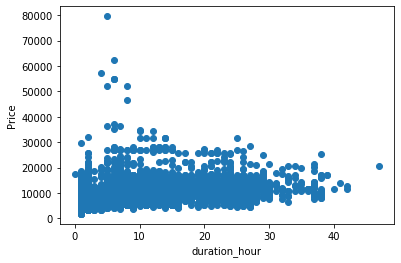

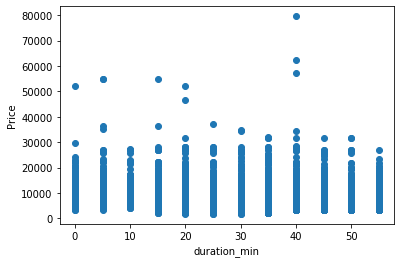

In [29]:
for feature in data.columns:
    plt.scatter(data[feature],data['Price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

using z score

In [30]:
from scipy import stats
z=np.abs(stats.zscore(data[cont_features]))

In [31]:
z

array([[1.12553455, 0.8897598 ],
       [0.30906781, 0.29284634],
       [1.03978296, 1.00914249],
       ...,
       [0.40296691, 0.77037711],
       [0.77218138, 0.8897598 ],
       [0.57809433, 0.17346365]])

In [32]:
array=np.where(z>3)
print(len(array[0]))
data.iloc[array[0],:].head() 

155


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min
123,Air India,Delhi,Cochin,1 stop,No Info,27430,2019,1,3,23,0,19,19,20,15
226,Jet Airways,Delhi,Cochin,2 stops,No Info,18799,2019,3,3,5,25,18,18,37,25
396,Multiple carriers,Delhi,Cochin,1 stop,No Info,36983,2019,1,3,12,50,19,19,6,25
486,Jet Airways,Banglore,New Delhi,1 stop,No Info,26890,2019,1,3,8,55,15,15,6,20
510,Jet Airways,Banglore,New Delhi,1 stop,No Info,26890,2019,1,3,7,0,12,12,5,25


In [33]:
array[0]

array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   826,   919,   925,   936,   946,   959,   966,   969,
         975,   991,  1113,  1196,  1246,  1318,  1341,  1346,  1424,
        1442,  1466,  1478,  1496,  1551,  1629,  1654,  1657,  1785,
        1791,  1804,  1918,  2055,  2099,  2108,  2495,  2553,  2556,
        2618,  2635,  2641,  2654,  2693,  2924,  3032,  3111,  3257,
        3400,  3457,  3496,  3535,  3700,  3790,  3966,  4012,  4047,
        4521,  4676,  4785,  4829,  5013,  5136,  5372,  5439,  5516,
        5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,
        5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,  6407,
        6476,  6576,  6588,  6605,  6991,  7001,  7189,  7232,  7306,
        7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,  7612,
        7617,  7713,  7724,  7756,  7902,  7906,  8020,  8080,  8127,
        8360,  8409,  8412,  8451,  8470,  8536,  8598,  8621,  8698,
        8856,  8940,

# removing outliers

In [34]:
s=pd.Series(array[0])
mean=s.mean()
print(mean)
median=s.median()
std=s.std()
value=mean+2*median
print(value)
outliers=[123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   826,   919,   925,   936,   946,   959,   966,   969,
         975,   991,  1113,  1196,  1246,  1318,  1341,  1346,  1424,
        1442,  1466,  1478,  1496,  1551,  1629,  1654,  1657,  1785,
        1791,  1804,  1918,  2055,  2099,  2108,  2495,  2553,  2556,
        2618,  2635,  2641,  2654,  2693,  2924,  3032,  3111,  3257,
        3400,  3457,  3496,  3535,  3700,  3790,  3966,  4012,  4047,
        4521,  4676,  4785,  4829,  5013,  5136,  5372,  5439,  5516,
        5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,
        5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,  6407,
        6476,  6576,  6588,  6605,  6991,  7001,  7189,  7232,  7306,
        7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,  7612,
        7617,  7713,  7724,  7756,  7902,  7906,  8020,  8080,  8127,
        8360,  8409,  8412,  8451,  8470,  8536,  8598,  8621,  8698,
        8856,  8940,  8957,  8990,  9019,  9192,  9238,  9246,  9395,
        9550,  9631,  9672,  9702,  9714,  9847,  9973, 10019, 10051,
       10112, 10159, 10181, 10188, 10325, 10352, 10363, 10382, 10438,
       10455, 10510,7,   515,  1824,  1828,  2127,  2405,  2591,  2633,  2691,
        3317,  4765,  5162,  5293,  5523,  5850,  5980,  6526,  6901,
        7120,  8912,  8987,  9043,  9054,  9265,  9302,  9371,  9555,
        9688,  9929, 10350]
data.iloc[outliers,5:6]=value
data.head()


5339.567741935484
16777.567741935483


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897.0,2019,3,24,22,20,1,1,2,50
1,Air India,Kolkata,Banglore,2 stops,No Info,7662.0,2019,1,5,5,50,13,13,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882.0,2019,9,6,9,25,4,4,1,0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218.0,2019,12,5,18,5,23,23,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302.0,2019,1,3,16,50,21,21,4,45


In [35]:
mean=data['duration_hour'].mean()
std=data['duration_hour'].std()
value=mean+2*std
print(value)
outliers=[226, 553,   919,   925,   966,   969,   991,  1113,  1318,
         1346,  1442,  1496,  1551,  1657,  1791,  1804,  2553,  2641,
         2654,  3457,  3496,  3790,  3966,  4047,  4785,  5516,  5701,
         5711,  5782,  5933,  5953,  6059,  6085,  6321,  6476,  7001,
         7189,  7232,  7306,  7329,  7553,  7611,  7612,  7906,  8127,
         8360,  8409,  8412,  8621,  8698,  9246,  9395,  9550,  9672,
         9702,  9847, 10019, 10325, 10455,470, 2571, 2980, 5061, 7626, 9189]
data.iloc[outliers,13:14]=value
data.iloc[outliers,13:14].head()

26.20663664203844


,duration_hour
226,26.206637
553,26.206637
919,26.206637
925,26.206637
966,26.206637


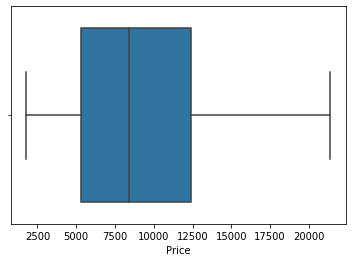

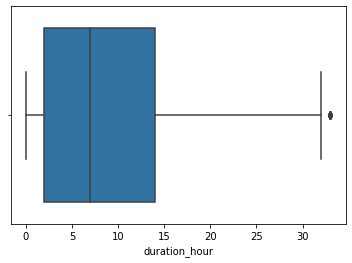

In [36]:
for feature in cont_features:
    sns.boxplot(data[feature])
    plt.show()

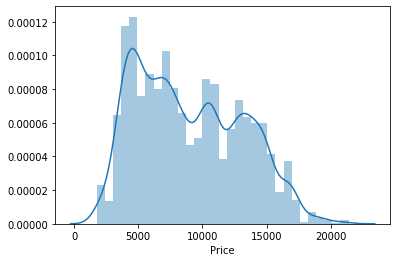

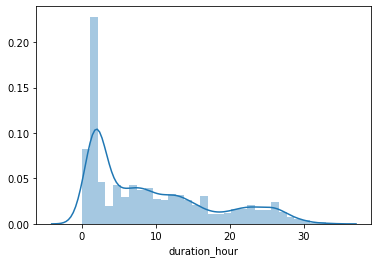

In [37]:
for feature in cont_features:
    sns.distplot(data[feature])
    plt.show()

In [38]:
#removed_outliers.value_counts()

In [39]:
#removed_outliers = data['duration_hour'].between(data['duration_hour'].quantile(.25), data['duration_hour'].quantile(.75))

In [40]:
for feature in cat_features:
    print(feature,'unique features {}'.format((len(data[feature].unique()))))

Airline unique features 12
Source unique features 5
Destination unique features 6
Total_Stops unique features 5
Additional_Info unique features 9


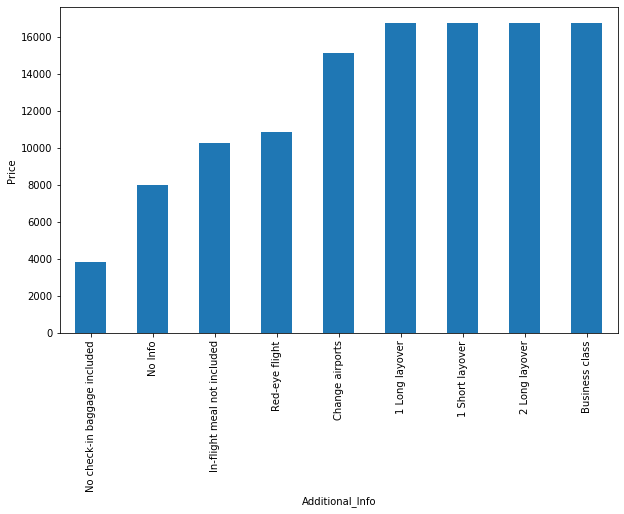

In [41]:
plt.figure(figsize=(10,6))
data.groupby('Additional_Info')['Price'].median().sort_values().plot.bar()
plt.ylabel('Price')
plt.show()

In [42]:
frequent=data['Additional_Info'].mode()

In [43]:
data['Additional_Info'].replace({'1 Long layover':'No Info','Change airports':'No Info','Business class':'No Info','2 Long layover':'No Info',
                                 'Red-eye flight':'No Info','1 Short layover':'No Info'},inplace=True)

In [44]:
array=data['Additional_Info'].value_counts().sort_values(ascending=False).to_dict()
array

{'No Info': 8380,
 'In-flight meal not included': 1982,
 'No check-in baggage included': 320}

In [45]:
data['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included'], dtype=object)

In [46]:
array={k:i for i,k in enumerate(array,0)}
array

{'No Info': 0,
 'In-flight meal not included': 1,
 'No check-in baggage included': 2}

In [47]:
data['Additional_Info_encoded']=data['Additional_Info'].map(array)


In [48]:
data['Additional_Info_encoded'].head()

0    0
1    0
2    0
3    0
4    0
Name: Additional_Info_encoded, dtype: int64

In [49]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

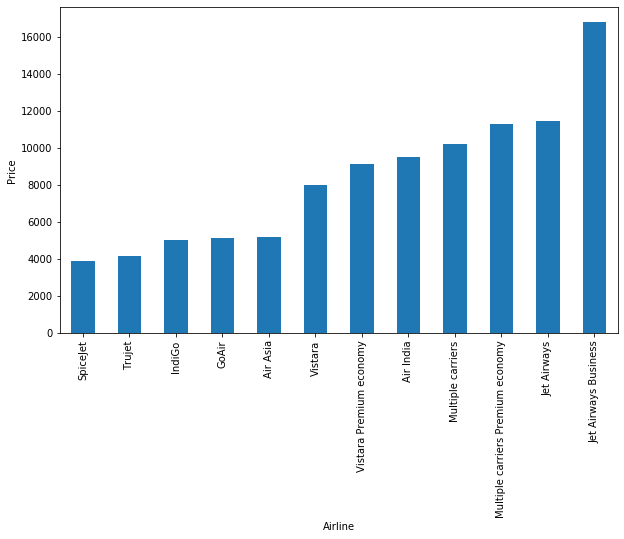

In [50]:
plt.figure(figsize=(10,6))
data.groupby('Airline')['Price'].median().sort_values().plot.bar()
plt.ylabel('Price')
plt.show()

In [51]:
import seaborn as sns

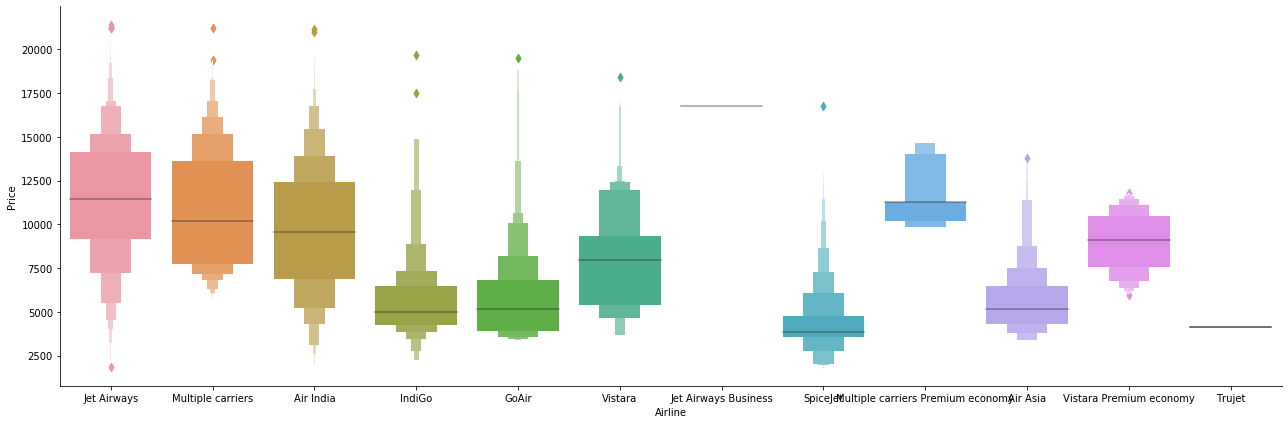

In [52]:
sns.catplot(y = "Price", x = "Airline", data =data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


In [53]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4330.351550
Air Asia                              5590.260188
IndiGo                                5671.064573
GoAir                                 5830.044164
Vistara                               7765.769735
Vistara Premium economy               8962.333333
Air India                             9624.475688
Multiple carriers                    10788.915870
Multiple carriers Premium economy    11418.846154
Jet Airways                          11433.394737
Jet Airways Business                 16777.567742
Name: Price, dtype: float64

In [54]:
array=data['Airline'].value_counts().sort_values(ascending=False).to_dict()
array

{'Jet Airways': 3849,
 'IndiGo': 2053,
 'Air India': 1751,
 'Multiple carriers': 1196,
 'SpiceJet': 818,
 'Vistara': 479,
 'Air Asia': 319,
 'GoAir': 194,
 'Multiple carriers Premium economy': 13,
 'Jet Airways Business': 6,
 'Vistara Premium economy': 3,
 'Trujet': 1}

In [1]:
array={k:i for i,k in enumerate(array,0)}

NameError: name 'array' is not defined

In [56]:
data['Airlines_encoded']=data['Airline'].map(array)


In [57]:
data['Airlines_encoded'].unique()

array([ 1,  2,  0,  4,  3,  7,  5,  6, 10,  9,  8, 11], dtype=int64)

In [58]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

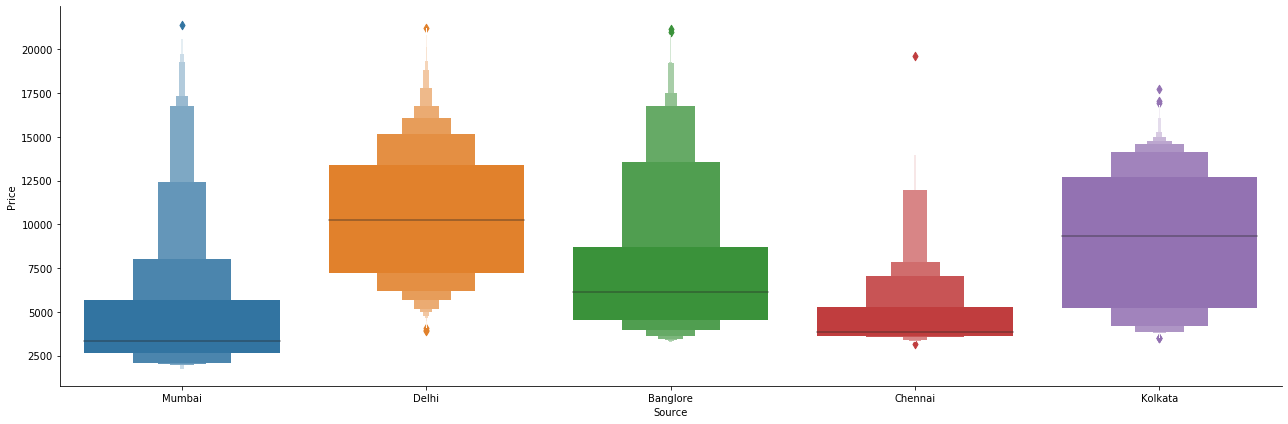

In [59]:
sns.catplot(y='Price',x='Source',data=data.sort_values(by='Price',ascending=False),kind="boxen", height = 6, aspect = 3)

In [60]:
data['Source'].value_counts(ascending=False)

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [61]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897.0,2019,3,24,22,20,1,1,2.0,50,0,1
1,Air India,Kolkata,Banglore,2 stops,No Info,7662.0,2019,1,5,5,50,13,13,7.0,25,0,2
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882.0,2019,9,6,9,25,4,4,1.0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218.0,2019,12,5,18,5,23,23,5.0,25,0,1
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302.0,2019,1,3,16,50,21,21,4.0,45,0,1


In [62]:
source=data[['Source']]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [63]:
destination=data[['Destination']]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [64]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

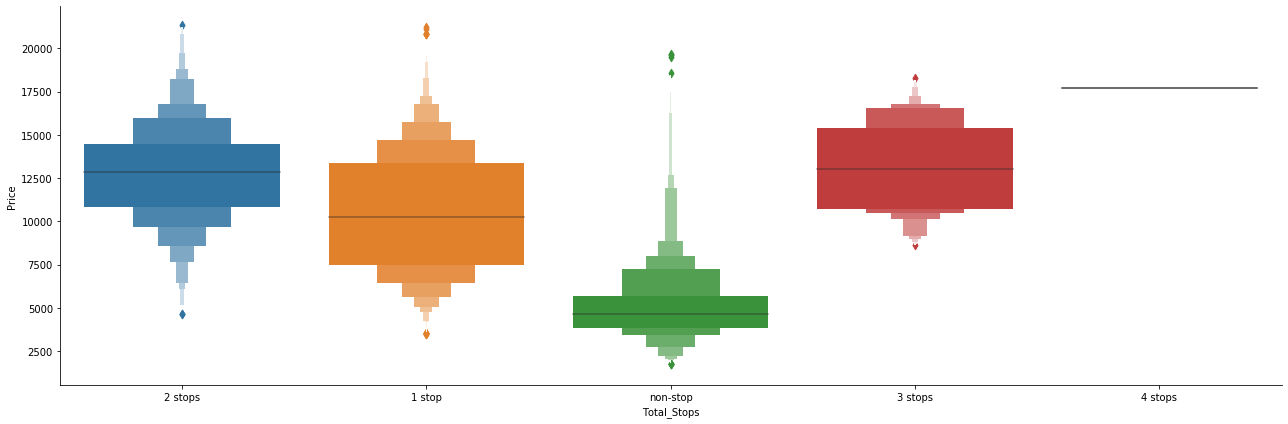

In [65]:
sns.catplot(y='Price',x='Total_Stops',data=data.sort_values('Price',ascending=False),kind="boxen", height = 6, aspect = 3)

In [66]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [67]:
frequent=data['Total_Stops'].mode()
data['Total_Stops'].replace({'3 stops':'1 stop','4 stops':'1 stop'},inplace=True)


In [68]:
array=data['Total_Stops'].value_counts().to_dict()
array

{'1 stop': 5671, 'non-stop': 3491, '2 stops': 1520}

In [69]:
array={'non-stop':0,'1 stop':1,'2 stops':2}
data['Total_Stops_encoder']=data['Total_Stops'].map(array)


In [70]:
data['Total_Stops_encoder'].head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops_encoder, dtype: int64

In [71]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897.0,2019,3,24,22,20,1,1,2.0,50,0,1,0
1,Air India,Kolkata,Banglore,2 stops,No Info,7662.0,2019,1,5,5,50,13,13,7.0,25,0,2,2
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882.0,2019,9,6,9,25,4,4,1.0,0,0,0,2
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218.0,2019,12,5,18,5,23,23,5.0,25,0,1,1
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302.0,2019,1,3,16,50,21,21,4.0,45,0,1,1


In [72]:
data.drop(['Total_Stops','Source','Destination','Airline','Additional_Info','year_of_Journey'],axis=1,inplace=True)

In [73]:
data.head()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder
0,3897.0,3,24,22,20,1,1,2.0,50,0,1,0
1,7662.0,1,5,5,50,13,13,7.0,25,0,2,2
2,13882.0,9,6,9,25,4,4,1.0,0,0,0,2
3,6218.0,12,5,18,5,23,23,5.0,25,0,1,1
4,13302.0,1,3,16,50,21,21,4.0,45,0,1,1


In [74]:
data=pd.concat([data,source,destination],axis=1)

In [75]:
data.head()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897.0,3,24,22,20,1,1,2.0,50,0,1,0,0,0,0,0,0,0,0,0,1
1,7662.0,1,5,5,50,13,13,7.0,25,0,2,2,0,0,1,0,0,0,0,0,0
2,13882.0,9,6,9,25,4,4,1.0,0,0,0,2,0,1,0,0,1,0,0,0,0
3,6218.0,12,5,18,5,23,23,5.0,25,0,1,1,0,0,1,0,0,0,0,0,0
4,13302.0,1,3,16,50,21,21,4.0,45,0,1,1,0,0,0,0,0,0,0,0,1


In [76]:
data=data.dropna()

In [77]:
#data['Price']=data['Price'].astype(int)
#data['Price']=np.log(data['Price'])

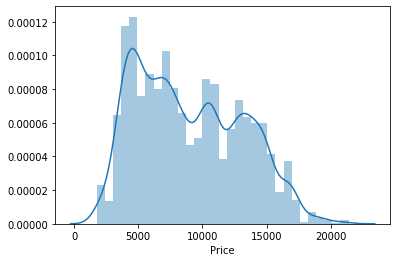

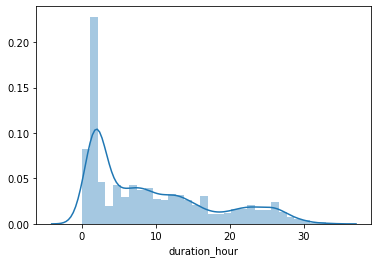

In [78]:
for feature in cont_features:
    sns.distplot(data[feature])
    plt.show()

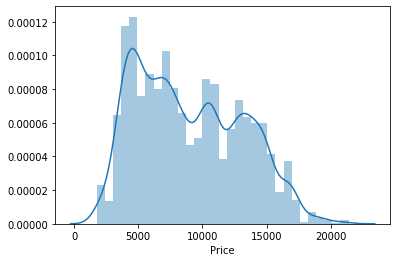

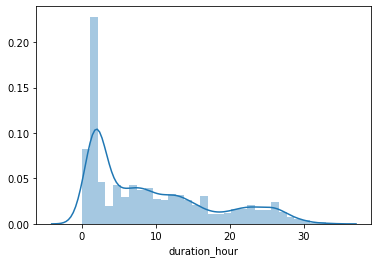

In [79]:
for feature in cont_features:
    sns.distplot(data[feature])
    plt.show()

In [80]:
data.head()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897.0,3,24,22,20,1,1,2.0,50,0,1,0,0,0,0,0,0,0,0,0,1
1,7662.0,1,5,5,50,13,13,7.0,25,0,2,2,0,0,1,0,0,0,0,0,0
2,13882.0,9,6,9,25,4,4,1.0,0,0,0,2,0,1,0,0,1,0,0,0,0
3,6218.0,12,5,18,5,23,23,5.0,25,0,1,1,0,0,1,0,0,0,0,0,0
4,13302.0,1,3,16,50,21,21,4.0,45,0,1,1,0,0,0,0,0,0,0,0,1


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 21 columns):
Price                      10682 non-null float64
month_of_Journey           10682 non-null int64
day_of_Journey             10682 non-null int64
Dep_Hour                   10682 non-null int64
Dep_Min                    10682 non-null int64
Arrival_hour               10682 non-null int64
Arrival_min                10682 non-null int64
duration_hour              10682 non-null float64
duration_min               10682 non-null int64
Additional_Info_encoded    10682 non-null int64
Airlines_encoded           10682 non-null int64
Total_Stops_encoder        10682 non-null int64
Source_Chennai             10682 non-null uint8
Source_Delhi               10682 non-null uint8
Source_Kolkata             10682 non-null uint8
Source_Mumbai              10682 non-null uint8
Destination_Cochin         10682 non-null uint8
Destination_Delhi          10682 non-null uint8
Destination_Hyderabad  

In [82]:
data.describe()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,8974.192330,5.534731,12.682925,12.491013,24.409287,13.349186,13.349186,9.386110,28.326624,0.245460,1.711384,0.815484,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,4101.063205,2.987626,8.803800,5.748820,18.767801,6.859317,6.859317,8.195258,16.945817,0.495122,1.844208,0.659622,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,8.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,14.000000,7.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12384.000000,6.000000,21.000000,18.000000,40.000000,19.000000,19.000000,14.000000,45.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,21375.000000,12.000000,27.000000,23.000000,55.000000,23.000000,23.000000,33.000000,55.000000,2.000000,11.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


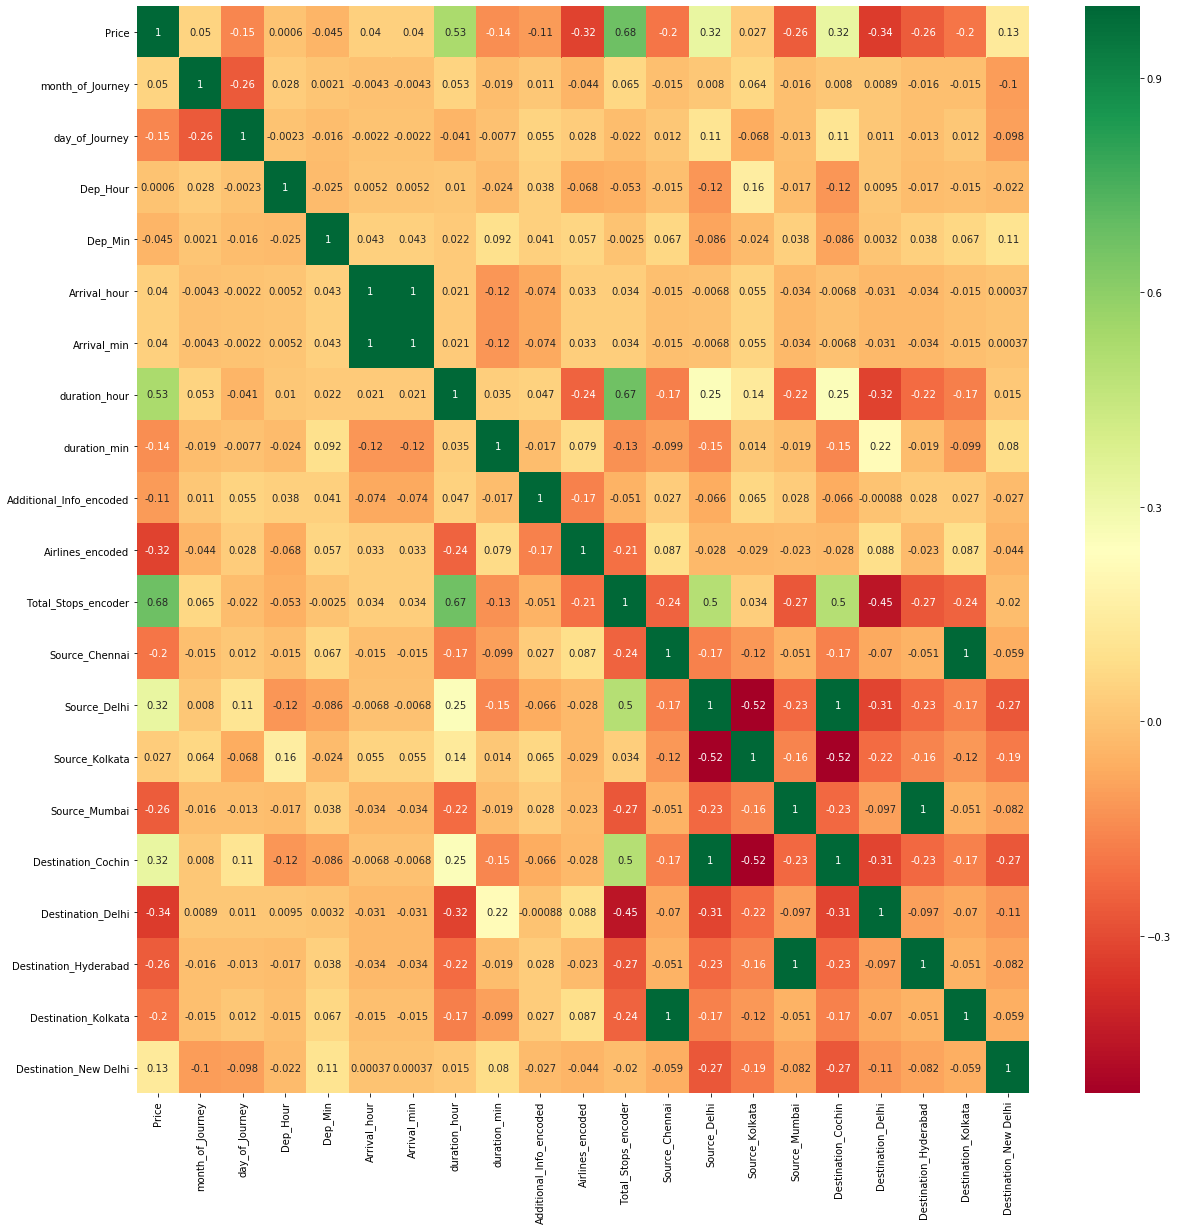

In [83]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()


In [84]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
x.head()

,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,24,22,20,1,1,2.0,50,0,1,0,0,0,0,0,0,0,0,0,1
1,1,5,5,50,13,13,7.0,25,0,2,2,0,0,1,0,0,0,0,0,0
2,9,6,9,25,4,4,1.0,0,0,0,2,0,1,0,0,1,0,0,0,0
3,12,5,18,5,23,23,5.0,25,0,1,1,0,0,1,0,0,0,0,0,0
4,1,3,16,50,21,21,4.0,45,0,1,1,0,0,0,0,0,0,0,0,1


In [85]:
y

0         3897.000000
1         7662.000000
2        13882.000000
3         6218.000000
4        13302.000000
5         3873.000000
6        11087.000000
7        16777.567742
8        11087.000000
9         8625.000000
10        8907.000000
11        4174.000000
12        4667.000000
13        9663.000000
14        4804.000000
15       14011.000000
16        5830.000000
17       10262.000000
18       13381.000000
19       12898.000000
20       19495.000000
21        6955.000000
22        3943.000000
23        4823.000000
24        7757.000000
25       13292.000000
26        8238.000000
27        7682.000000
28        4668.000000
29        3687.000000
             ...     
10653    14388.000000
10654     4319.000000
10655     5678.000000
10656     5613.000000
10657     9663.000000
10658     5769.000000
10659     4668.000000
10660     4878.000000
10661     8372.000000
10662    12352.000000
10663    11733.000000
10664     4823.000000
10665     4804.000000
10666    10262.000000
10667    1

In [360]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.utils import to_categorical

In [362]:
sc=MinMaxScaler()

In [363]:
# using scaled feature for regression type models
scaled_data=sc.fit(data)
scaled_data=scaled_data.transform(data)
scaled_data=pd.DataFrame(scaled_data)
scaled_data.columns=data.columns
scaled_data.head()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.108993,0.181818,0.875000,0.956522,0.363636,0.043478,0.043478,0.060606,0.909091,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.300928,0.000000,0.083333,0.217391,0.909091,0.565217,0.565217,0.212121,0.454545,0.0,0.181818,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.618016,0.727273,0.125000,0.391304,0.454545,0.173913,0.173913,0.030303,0.000000,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.227314,1.000000,0.083333,0.782609,0.090909,1.000000,1.000000,0.151515,0.454545,0.0,0.090909,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588448,0.000000,0.000000,0.695652,0.909091,0.913043,0.913043,0.121212,0.818182,0.0,0.090909,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [364]:
scaled_data.iloc[:,0].tail()

10677    0.119698
10678    0.121635
10679    0.278854
10680    0.555108
10681    0.509482
Name: Price, dtype: float64

In [365]:
scaled_x=scaled_data.iloc[:,1:]
scaled_y=scaled_data.iloc[:,0]

In [366]:
scaled_x.shape

(10682, 20)

In [367]:
scaled_y.shape

(10682,)

In [368]:
scaled_y=to_categorical(scaled_y)

In [369]:
scaled_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=0)

In [372]:
x_train=np.array(x_train)

In [373]:
x_train.shape

(8545, 20)

In [374]:
x_train=x_train.reshape(8545,2,10)

In [375]:
x_train.shape

(8545, 2, 10)

In [376]:
y_train.shape

(8545, 2)

# Training model using keras 

In [91]:
import tensorflow as tf
from tensorflow import keras

In [92]:
from keras.layers import LSTM,Dense,Dropout,Embedding
from keras.models import Sequential


Using TensorFlow backend.


In [396]:
model=Sequential()
model.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform',input_shape=(2,10))) 
model.add(Dropout(0.3))
model.add(LSTM(6,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

In [397]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 2, 6)              66        
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 6)              0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 6)                 312       
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 14        
Total params: 392
Trainable params: 392
Non-trainable params: 0
_________________________________________________________________


In [398]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

In [399]:
model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8545/8545 [==============================] - 2s 211us/step - loss: 0.2835 - acc: 0.9737
Epoch 2/100
8545/8545 [==============================] - 1s 82us/step - loss: 0.0591 - acc: 0.9998
Epoch 3/100
8545/8545 [==============================] - 1s 87us/step - loss: 0.0157 - acc: 0.9999
Epoch 4/100
8545/8545 [==============================] - 1s 87us/step - loss: 0.0097 - acc: 0.9999
Epoch 5/100
8545/8545 [==============================] - 1s 87us/step - loss: 0.0093 - acc: 0.9999
Epoch 6/100
8545/8545 [==============================] - 1s 78us/step - loss: 0.0081 - acc: 0.9999
Epoch 7/100
8545/8545 [==============================] - 1s 86us/step - loss: 0.0081 - acc: 0.9999
Epoch 8/100
8545/8545 [==============================] - 1s 84us/step - loss: 0.0068 - acc: 0.9999
Epoch 9/100
8545/8545 [==============================] - 1s 81us/step - loss: 0.0062 - acc: 0.9999
Epoch 10/100
8545/8545 [==============================] - 1s 83us/step - loss: 0.0055 - acc: 0.9999
Epoch 11

KeyboardInterrupt: 

In [381]:
x_test=np.array(x_test).reshape(2137,2,10)

In [383]:
y_pred=model.predict(x_test)

In [391]:
y_pred

array([[1.0000000e+00, 2.5214795e-24],
       [1.0000000e+00, 8.0893916e-37],
       [1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.1292329e-33],
       [1.0000000e+00, 1.5010663e-26]], dtype=float32)

In [346]:
from sklearn.metrics import r2_score,accuracy_score

In [384]:
r2_score(y_test,y_pred)

0.0

In [392]:
sc=StandardScaler()

In [393]:
sc.inverse_transform(y_pred)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# Test data

In [ ]:
test_data=pd.read_excel(r'Test_set.xlsx')
test_data.head()

In [ ]:
test_data.shape